**Pra Pemrosesan Data**

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data_train.csv")
data.head()

ID        tanggal_waktu  suhu  beban_listrik  kecepatan_angin  \
0   0  2021-09-17 00:00:00  15.9          -17.1          571.910   
1   1  2021-09-17 01:00:00  15.5          -19.3          575.040   
2   2  2021-09-17 02:00:00  15.1          -20.0          578.435   
3   3  2021-09-17 03:00:00  15.9          -17.1          582.580   
4   4  2021-09-17 04:00:00  15.9          -19.3          586.600   

   tekanan_udara dampak_lingkungan  konsumsi_listrik  
0         1003.0                 A             216.0  
1          996.0                 A             210.0  
2         1000.0                 A             225.0  
3          995.0                 A             216.0  
4         1005.0                 A             222.0

In [3]:
data.dtypes

ID                     int64
tanggal_waktu         object
suhu                 float64
beban_listrik        float64
kecepatan_angin      float64
tekanan_udara        float64
dampak_lingkungan     object
konsumsi_listrik     float64
dtype: object

In [4]:
# Konversi kolom tanggal_waktu menjadi datetime
data['tanggal_waktu'] = pd.to_datetime(data['tanggal_waktu'], format="%Y-%m-%d %H:%M:%S")

In [5]:
# Konversi kolom dampak_lingkungan menjadi string
data['dampak_lingkungan'] = data['dampak_lingkungan'].astype(str)

In [6]:
data['dampak_lingkungan'].unique()

array(['A', 'B', 'C'], dtype=object)

In [7]:
# Membuat kolom ID menjadi index
data = data.set_index('tanggal_waktu')
data

ID  suhu  beban_listrik  kecepatan_angin  \
tanggal_waktu                                                      
2021-09-17 00:00:00      0  15.9          -17.1          571.910   
2021-09-17 01:00:00      1  15.5          -19.3          575.040   
2021-09-17 02:00:00      2  15.1          -20.0          578.435   
2021-09-17 03:00:00      3  15.9          -17.1          582.580   
2021-09-17 04:00:00      4  15.9          -19.3          586.600   
...                    ...   ...            ...              ...   
2025-05-19 19:00:00  32179  27.8           10.7            4.505   
2025-05-19 20:00:00  32180  27.8            7.9            4.005   
2025-05-19 21:00:00  32181  27.8           10.0            5.920   
2025-05-19 22:00:00  32182  27.0            9.3            3.040   
2025-05-19 23:00:00  32183  27.4           10.0            4.205   

                     tekanan_udara dampak_lingkungan  konsumsi_listrik  
tanggal_waktu                                                           
2021-09-17 00:00:00         1003.0                 A             216.0  
2021-09-17 01:00:00          996.0                 A             210.0  
2021-09-17 02:00:00         1000.0                 A             225.0  
2021-09-17 03:00:00          995.0                 A             216.0  
2021-09-17 04:00:00         1005.0                 A             222.0  
...                            ...               ...               ...  
2025-05-19 19:00:00          981.0                 A             186.0  
2025-05-19 20:00:00          976.0                 A             198.0  
2025-05-19 21:00:00          989.0                 A             192.0  
2025-05-19 22:00:00          982.0                 A             183.0  
2025-05-19 23:00:00          979.0                 A             192.0  

[24336 rows x 7 columns]

In [8]:
# Menghitung jumlah baris yang memiliki nilai kosong
data.isnull().sum()

ID                    0
suhu                  0
beban_listrik         0
kecepatan_angin       0
tekanan_udara         0
dampak_lingkungan     0
konsumsi_listrik     53
dtype: int64

In [9]:
# Memeriksa data yang kosong
data[data.isnull().any(axis=1)].head()

ID  suhu  beban_listrik  kecepatan_angin  \
tanggal_waktu                                                     
2021-09-20 20:00:00    92  18.7          -16.4           45.110   
2021-11-04 01:00:00  1153  18.7           -6.4            2.640   
2022-01-05 22:00:00  2662  23.4           -0.7            3.530   
2022-01-25 18:00:00  3138  30.6           -6.4           59.175   
2022-02-01 01:00:00  3289  27.4            8.6            2.790   

                     tekanan_udara dampak_lingkungan  konsumsi_listrik  
tanggal_waktu                                                           
2021-09-20 20:00:00          993.0                 A               NaN  
2021-11-04 01:00:00          996.0                 A               NaN  
2022-01-05 22:00:00          979.0                 A               NaN  
2022-01-25 18:00:00          981.0                 A               NaN  
2022-02-01 01:00:00          966.0                 A               NaN

In [10]:
# Karena data yang kosong terdapat pada kolom konsumsi_listrik, hal ini dapat mengganggu analisis. Oleh karena itu,
# mempertimbangkan jumlah yang tidak signifikan, seluruh baris yang bersangkutan dihapus
data = data.dropna()

In [11]:
Q1 = data.select_dtypes(include=np.number).quantile(0.25)
Q3 = data.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR 
filter = (data.select_dtypes(include=np.number) >= lower_limit) & (data.select_dtypes(include=np.number) <= upper_limit)
data = data[filter.all(axis=1)]

**Exploratory Data Analysis (EDA)**

In [12]:
from sklearn.linear_model import LinearRegression

# Data dilakukan training
X = data.loc[:, ['tanggal_waktu']]  # features
y = data.loc[:, 'konsumsi_listrik']  # target

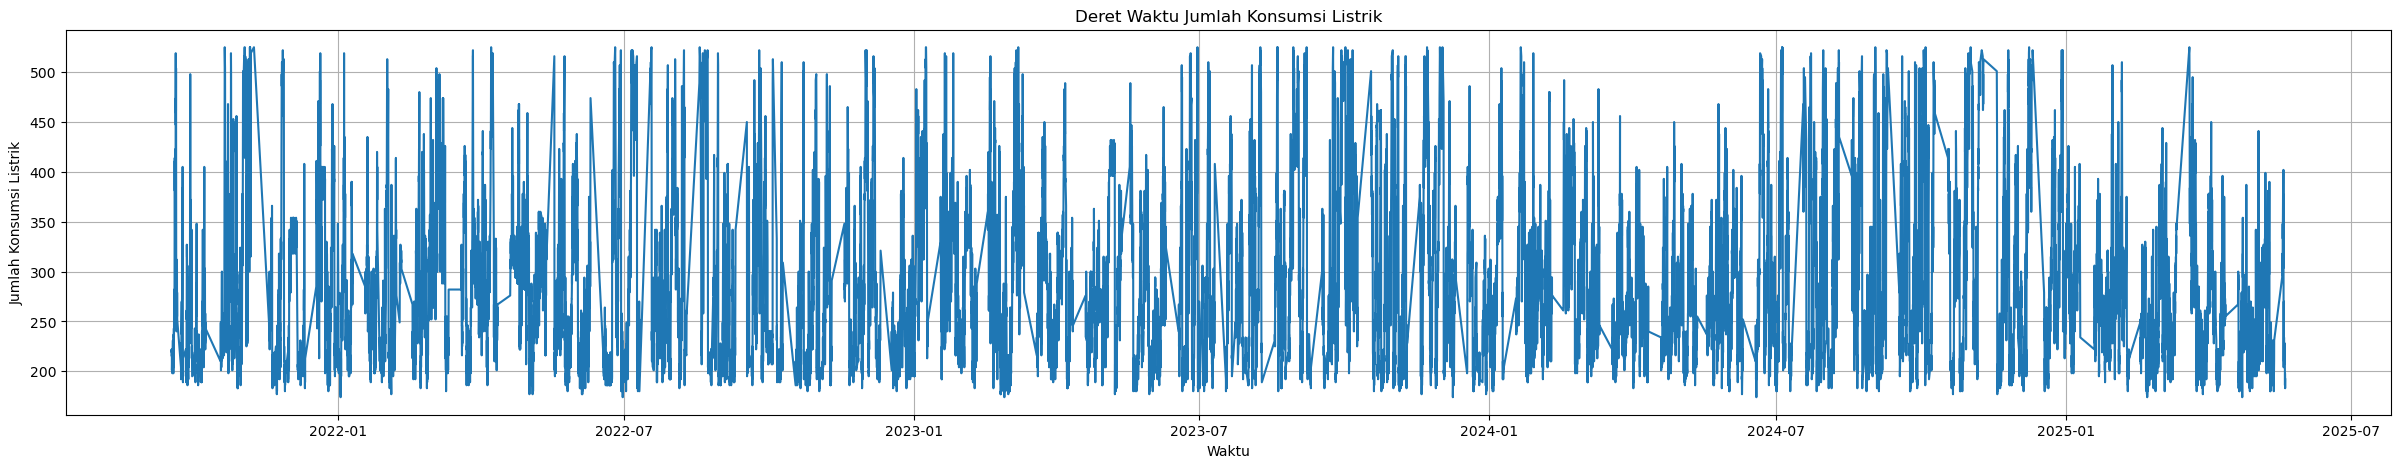

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,5))
plt.plot(data['tanggal_waktu'], data['konsumsi_listrik'])
plt.title("Deret Waktu Jumlah Konsumsi Listrik")
plt.xlabel("Waktu")
plt.ylabel("Jumlah Konsumsi Listrik")
plt.grid(True)
plt.show()

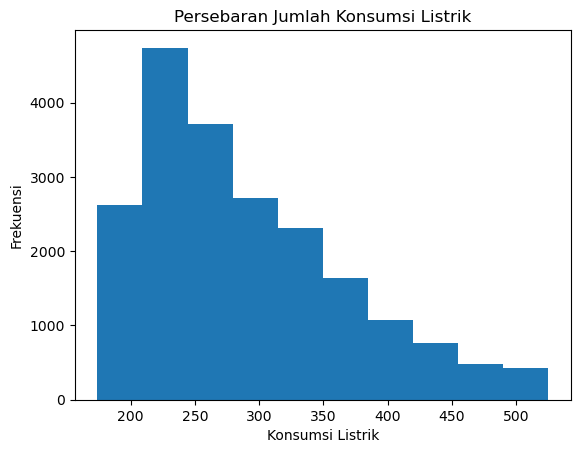

Rangkuman Statistik Persebaran Jumlah Konsumsi Listrik


count    20497.000000
mean       289.474752
std         78.607700
min        174.000000
25%        225.000000
50%        270.000000
75%        336.000000
max        525.000000
Name: konsumsi_listrik, dtype: float64

In [14]:
plt.hist(data["konsumsi_listrik"])
plt.title("Persebaran Jumlah Konsumsi Listrik")
plt.xlabel("Konsumsi Listrik")
plt.ylabel("Frekuensi")
plt.show()
print("Rangkuman Statistik Persebaran Jumlah Konsumsi Listrik")
data["konsumsi_listrik"].describe()

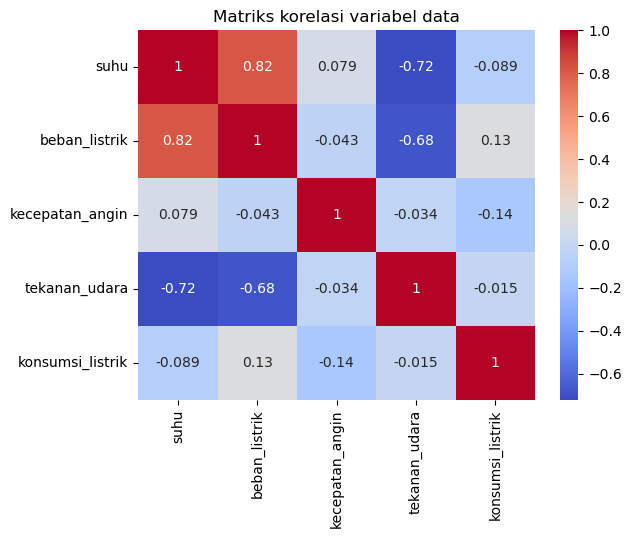

In [15]:
import seaborn as sns

correlation_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriks korelasi variabel data")
plt.show()

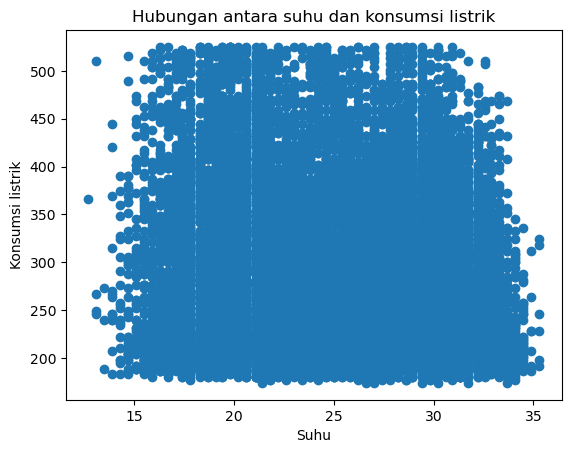

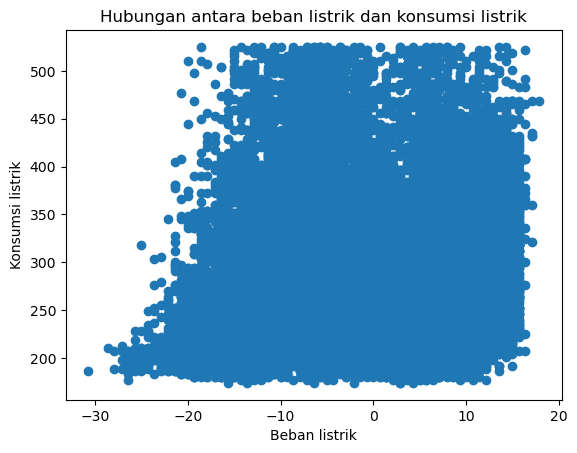

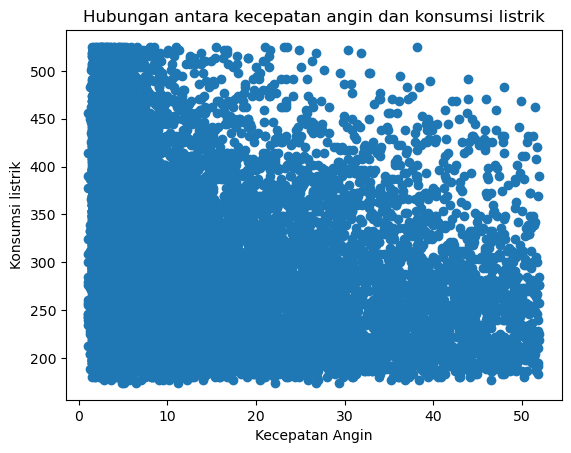

In [16]:
# Hubungan antara suhu dan konsumsi listrik
plt.scatter(data["suhu"], data["konsumsi_listrik"])
plt.title("Hubungan antara suhu dan konsumsi listrik")
plt.xlabel("Suhu")
plt.ylabel("Konsumsi listrik")
plt.show()

# Hubungan antara beban listrik dan konsumsi listrik
plt.scatter(data["beban_listrik"], data["konsumsi_listrik"])
plt.title("Hubungan antara beban listrik dan konsumsi listrik")
plt.xlabel("Beban listrik")
plt.ylabel("Konsumsi listrik")
plt.show()

# Hubungan antara kecepatan angin dan konsumsi listrik
plt.scatter(data["kecepatan_angin"], data["konsumsi_listrik"])
plt.title("Hubungan antara kecepatan angin dan konsumsi listrik")
plt.xlabel("Kecepatan Angin")
plt.ylabel("Konsumsi listrik")
plt.show()

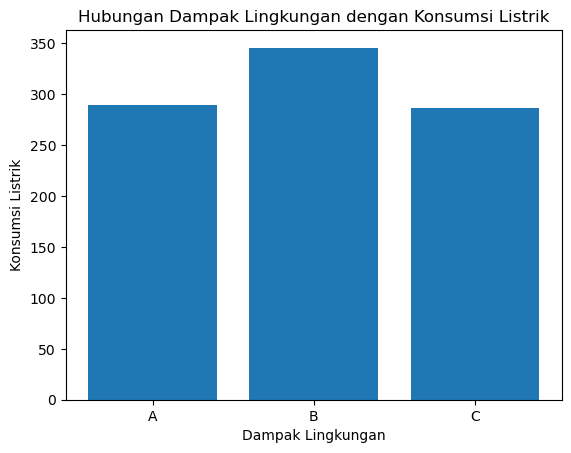

In [109]:
# Melakukan agregrasi rata-rata konsumsi listrik per kategori dampak_lingkungan
agg = data.groupby("dampak_lingkungan")["konsumsi_listrik"].mean()

# Menganalisis rata-rata konsumsi listrik per kategori dampak_lingkungan
plt.bar(agg.index, agg.values)
plt.title("Hubungan Dampak Lingkungan dengan Konsumsi Listrik")
plt.xlabel("Dampak Lingkungan")
plt.ylabel("Konsumsi Listrik")
plt.show()

Analisis Deret Waktu

In [17]:
data_decomposition = data.copy()

In [18]:
data_decomposition = data_decomposition.set_index("tanggal_waktu")

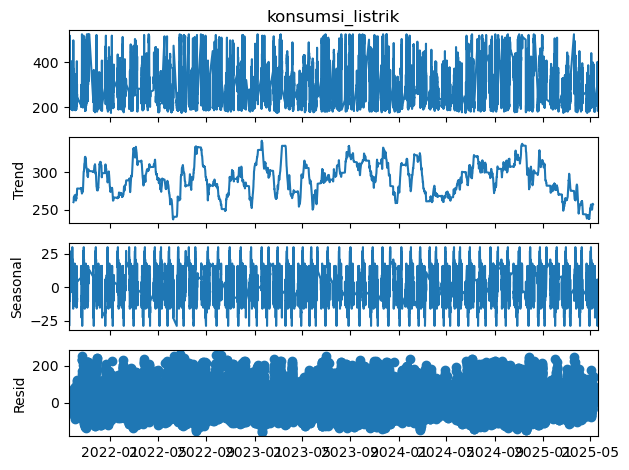

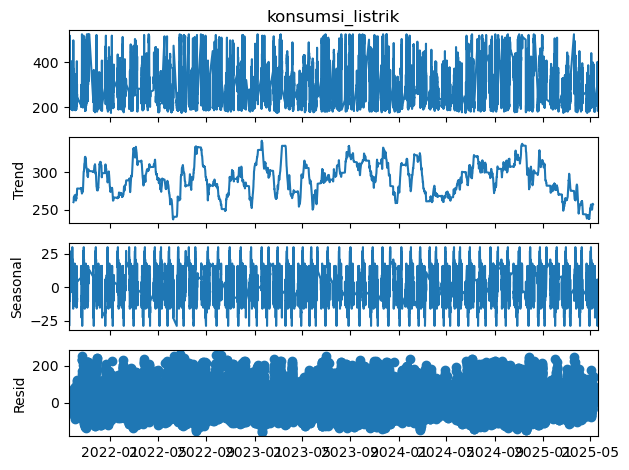

In [19]:
# Dekomposisi data additive

from statsmodels.tsa.seasonal import seasonal_decompose

additive_decomposition = seasonal_decompose(data_decomposition['konsumsi_listrik'], model='additive', period=365)
additive_decomposition.plot()

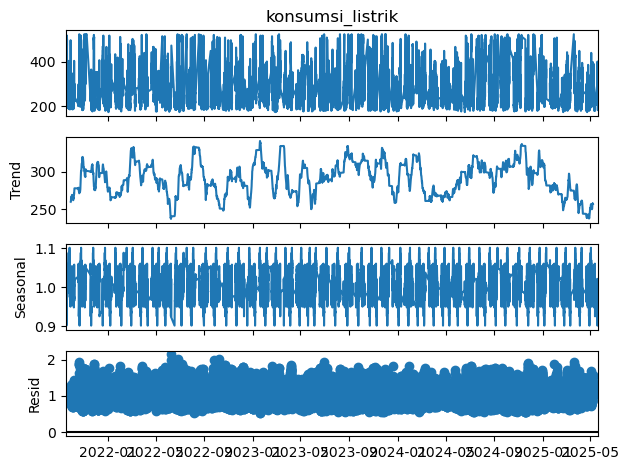

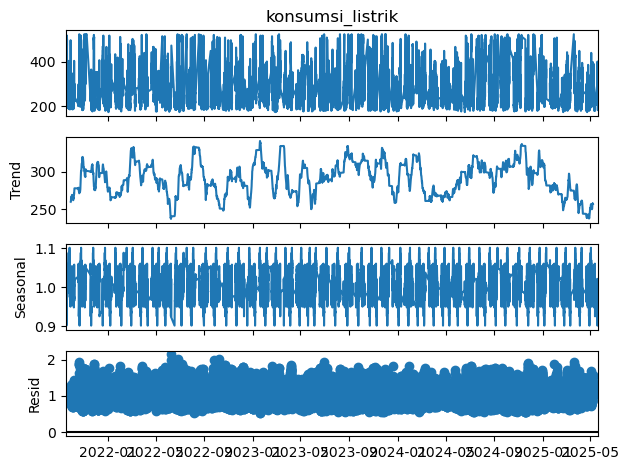

In [119]:
# Dekomposisi data multiplicative

multiplicative_decomposition = seasonal_decompose(data_decomposition['konsumsi_listrik'], model='multiplicative', period=365)
multiplicative_decomposition.plot()

In [13]:
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split

In [16]:
train_size = int(len(data) * 0.8)
data_single = data[["konsumsi_listrik"]]
data_single_train, data_single_test = data_single[:train_size], data_single[train_size:]

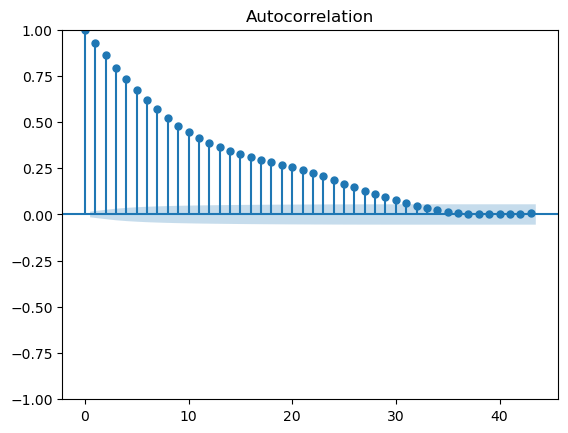

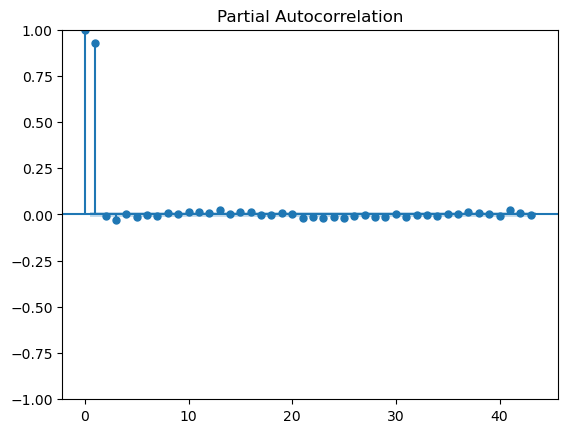

In [18]:
# Uji stationeritas
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(data_single_train.values)
pacf_original = plot_pacf(data_single_train.values)

In [19]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(data):
    result = adfuller(data, autolag='AIC')
    print('ADF Test Statistic :' + str(result[0]))
    print('p-value :'+ str(result[1]))
    print('Number of lags :' + str(result[2]))
    print('Number of observations used :' + str(result[3]))
    print('Critical values :')
    for key, value in result[4].items():
        print('\t' + str(key) + ' : ' + str(value))

In [20]:
adfuller_test(data_single_test["konsumsi_listrik"])

ADF Test Statistic :-8.645972733427433
p-value :5.26972066594894e-14
Number of lags :17
Number of observations used :4082
Critical values :
	1% : -3.4319529928875574
	5% : -2.8622483144634048
	10% : -2.5671470426612117


# Karena p-value sangat kecil, disimpulkan bahwa model sudah stasioner

In [21]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(data_single_train.values, order=(15, 1, 0))
arima_model_fit = arima_model.fit()

In [22]:
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                16397
Model:                ARIMA(15, 1, 0)   Log Likelihood              -78802.304
Date:                Wed, 18 Jun 2025   AIC                         157636.608
Time:                        09:00:11   BIC                         157759.884
Sample:                             0   HQIC                        157677.332
                              - 16397                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0432      0.005     -8.752      0.000      -0.053      -0.034
ar.L2         -0.0224      0.006     -3.590      0.000      -0.035      -0.010
ar.L3         -0.0528      0.006     -8.220      0.0

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(data_single_train.values, order=(1, 1, 0), seasonal_order=(1, 1, 0, 12), trend="n")
sarima_model_fit = sarima_model.fit()
sarima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                16397
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood              -82248.361
Date:                            Wed, 18 Jun 2025   AIC                         164502.721
Time:                                    09:00:28   BIC                         164525.833
Sample:                                         0   HQIC                        164510.357
                                          - 16397                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0230      0.006     -4.102      0.000      -0.034      -0.012
ar.S.L12      -0.5253      0.004   -141.181      0.000      -0.533      -0.518
sigma2      1342.0662      7.180    186.926      0.000    1327.994    1356.138
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             29995.90
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -0.47
Prob(H) (two-sided):                  0.15   Kurtosis:                         9.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [25]:
ses_model = ExponentialSmoothing(data_single_train.values, trend=None, seasonal=None, initialization_method='estimated')
ses_fit = ses_model.fit()

In [26]:
des_model = ExponentialSmoothing(data_single_train.values, trend='add', seasonal=None, initialization_method='estimated')
des_fit = des_model.fit()

In [27]:
tes_model = ExponentialSmoothing(
    data_single_train.values,
    # trend='add',
    seasonal='add',
    seasonal_periods=12,
    initialization_method='estimated'
)
tes_fit = tes_model.fit()

In [29]:
from sklearn.linear_model import LinearRegression

linearRegressionModel = LinearRegression()

xTrainLinearRegression = (data_single_train.index.copy() - data_single_train.index.copy().min()).days.values.reshape(-1, 1)
xTestLinearRegression = (data_single_train.index.copy() - data_single_train.index.copy().min()).days.values.reshape(-1, 1)
yTrainLinearRegression = data_single_train.values.copy()
yTestLinearRegression = data_single_train.values.copy()

linearRegressionModel.fit(xTrainLinearRegression, yTrainLinearRegression)

yPreadLinearRegression = linearRegressionModel.predict(xTestLinearRegression)

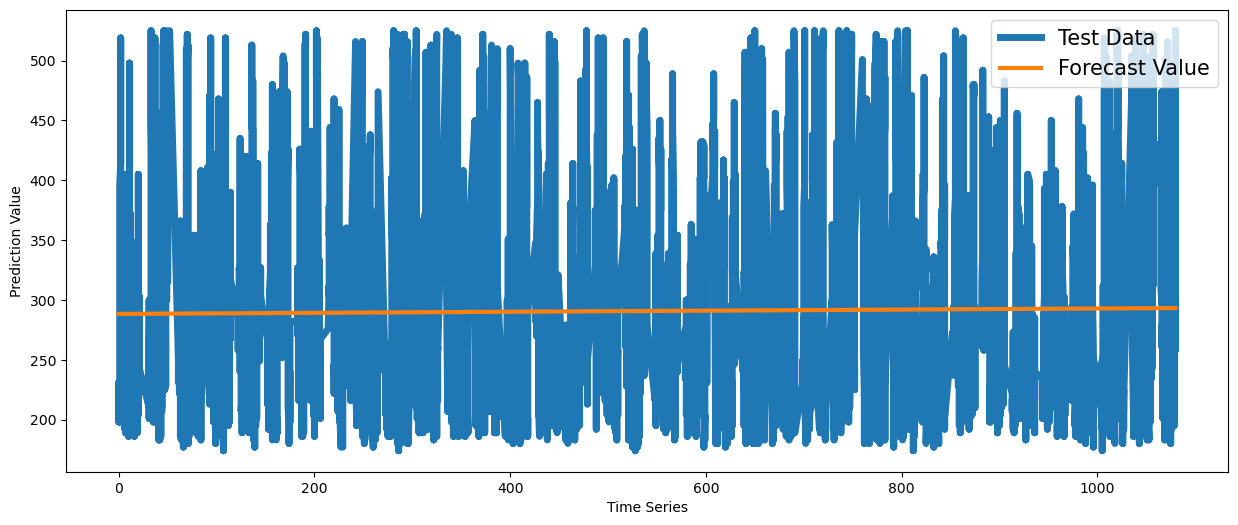

In [32]:
import matplotlib.pyplot as plt

linearRegression_fig = plt.figure()
linearRegression_fig.set_figwidth(15)
linearRegression_fig.set_figheight(6)

plt.xlabel("Time Series")
plt.ylabel("Prediction Value")

plt.plot(xTestLinearRegression, yTestLinearRegression, linewidth=5, label="Test Data")
plt.plot(xTestLinearRegression, yPreadLinearRegression, linewidth=3, label="Forecast Value")

plt.legend(fontsize=15)
plt.show()

In [43]:
from prophet import Prophet

dataTrainProphet = pd.DataFrame({'ds': data_single_train.index.copy(), 'y': data_single_train.iloc[:, 0].values.copy()})
dataTrainProphet['ds'] = pd.to_datetime(dataTrainProphet['ds'])

dataTestProphet = pd.DataFrame({'ds': data_single_test.index.copy(), 'y': data_single_test.iloc[:, 0].values.copy()})
dataTestProphet['ds'] = pd.to_datetime(dataTestProphet['ds'])

days_to_forecast = (data_single_test.index.max() - data_single_train.index.max()).days + 1

prophetModel = Prophet()
prophetModel.fit(dataTrainProphet)

futureProphet = prophetModel.make_future_dataframe(periods=days_to_forecast, freq="D")
forecastProphet = prophetModel.predict(futureProphet)
forecastProphet = forecastProphet[forecastProphet["ds"].isin(dataTestProphet["ds"])]

09:09:39 - cmdstanpy - INFO - Chain [1] start processing
09:09:47 - cmdstanpy - INFO - Chain [1] done processing


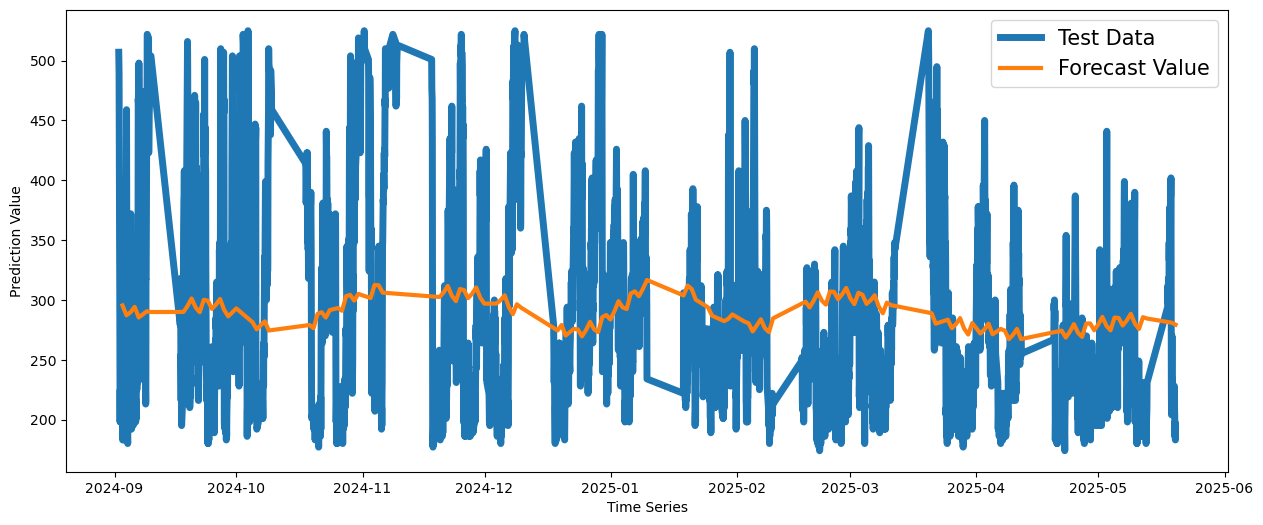

In [44]:
prophet_fig = plt.figure()
prophet_fig.set_figwidth(15)
prophet_fig.set_figheight(6)

plt.xlabel("Time Series")
plt.ylabel("Prediction Value")

plt.plot(dataTestProphet['ds'], dataTestProphet['y'], linewidth=5, label="Test Data")
plt.plot(forecastProphet['ds'], forecastProphet['yhat'], linewidth=3, label="Forecast Value")

plt.legend(fontsize=15)
plt.show()

In [45]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Create lag features for time series
def create_lag_features(series, lag=3):
    X, y = [], []
    for i in range(lag, len(series)):
        X.append(series.iloc[i - lag:i].values)
        y.append(series.iloc[i])
    return np.array(X), np.array(y)

In [48]:
# Create training and testing data with lag features
lag = 3
X_train, y_train = create_lag_features(data_single_train["konsumsi_listrik"], lag)
X_test, y_test = create_lag_features(data_single_test["konsumsi_listrik"], lag)

In [49]:
# Align test data (must start after the lag)
X_test = X_test[:len(y_test)]
y_test = y_test[:len(X_test)]

In [50]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [52]:
# Predict
y_pred_xgboost = model.predict(X_test_scaled)

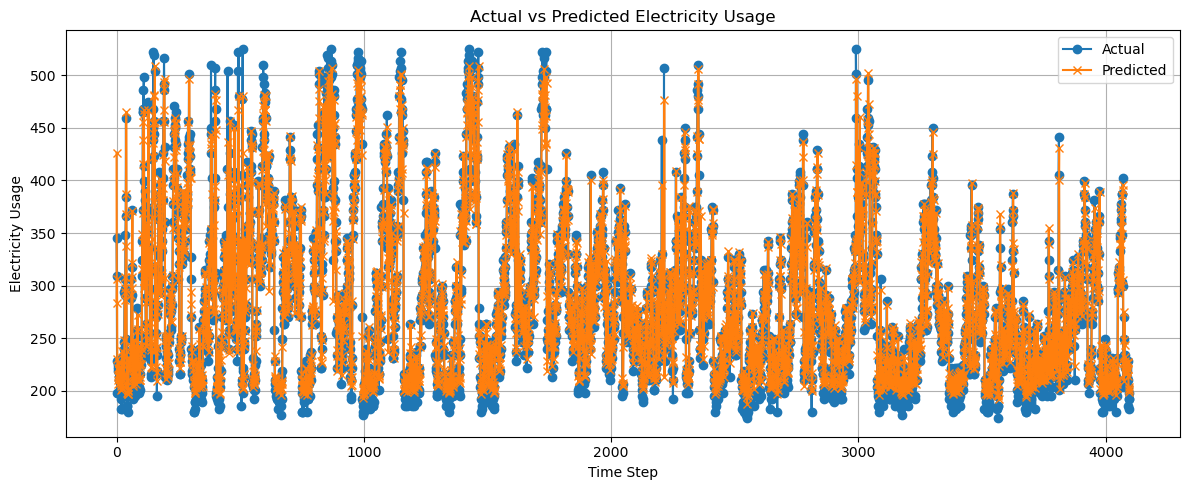

In [54]:
plt.figure(figsize=(12, 5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred_xgboost, label='Predicted', marker='x')
plt.title('Actual vs Predicted Electricity Usage')
plt.xlabel('Time Step')
plt.ylabel('Electricity Usage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [56]:
# Create lag features for time series
def create_lag_features(series, lag):
    X, y = [], []
    for i in range(len(series) - lag):
        X.append(series.iloc[i:i+lag].values)
        y.append(series.iloc[i+lag])
    return np.array(X), np.array(y)

In [57]:
# Create training and testing data with lag features
lag = 3
X_train, y_train = create_lag_features(data_single_train["konsumsi_listrik"], lag)
X_test, y_test = create_lag_features(data_single_test["konsumsi_listrik"], lag)

In [58]:
scaler = MinMaxScaler()

# Flatten X before scaling
X_train_flat = X_train.reshape(-1, 1)
X_test_flat = X_test.reshape(-1, 1)

X_train_scaled_flat = scaler.fit_transform(X_train_flat)
X_test_scaled_flat = scaler.transform(X_test_flat)

In [59]:
# Reshape back to original lag format
X_train_scaled = X_train_scaled_flat.reshape(X_train.shape[0], lag)
X_test_scaled = X_test_scaled_flat.reshape(X_test.shape[0], lag)

In [60]:
# Scale targets (y values)
y_train = scaler.transform(y_train.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.reshape(-1, 1)).flatten()

In [61]:
# Reshape for LSTM [samples, time_steps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], lag, 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], lag, 1))

In [62]:
# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(lag, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

C:\Users\Eric\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0324
Epoch 2/100
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0075
Epoch 3/100
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0069
Epoch 4/100
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0067
Epoch 5/100
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0070
Epoch 6/100
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0069
Epoch 7/100
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0067
Epoch 8/100
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0068
Epoch 9/100
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0070
Epoch 10/100
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0068
Epoch 11/100
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0070
Epoch 12/100
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0069
Epoch 13/100
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0071
Epoch 14/100
1025/1025 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0068
Epoch 15/100
10

In [64]:
# Predict and inverse transform
y_pred_lstm = model.predict(X_test_scaled).flatten()

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [65]:
# Inverse scale predictions and actual values
y_pred_inverse_lstm = scaler.inverse_transform(y_pred_lstm.reshape(-1, 1)).flatten()
y_test_inverse_lstm = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

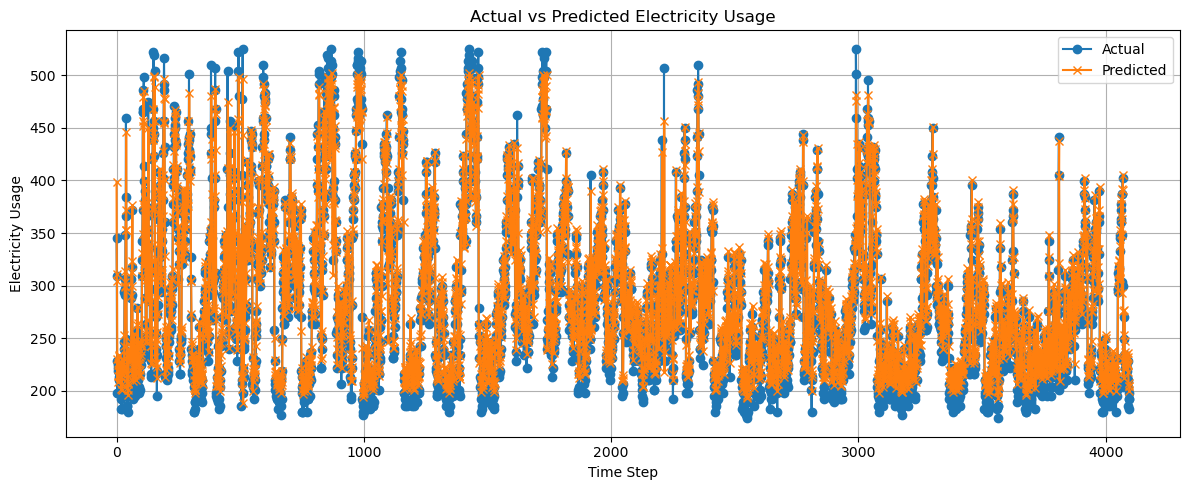

In [66]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_inverse_lstm, label='Actual', marker='o')
plt.plot(y_pred_inverse_lstm, label='Predicted', marker='x')
plt.title('Actual vs Predicted Electricity Usage')
plt.xlabel('Time Step')
plt.ylabel('Electricity Usage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
print(data.index.min())
print(data.index.max())

2021-09-17 05:00:00
2025-05-19 23:00:00


In [70]:
# Forecast future 300 values
future_preds = []

# Start with the last known window from X_test (reshaped to fit model)
last_window = X_test_scaled[-1]

In [71]:
for _ in range(300):
    input_seq = last_window.reshape(1, lag, 1)  # reshape for model input
    next_scaled = model.predict(input_seq, verbose=0)[0][0]  # predict next scaled value
    next_value = scaler.inverse_transform([[next_scaled]])[0][0]  # inverse scale to original value
    future_preds.append(next_value)

    # Update last_window by appending the new scaled prediction and removing the first value
    next_scaled_reshaped = np.array([[next_scaled]])  # shape (1, 1)
    last_window = np.append(last_window[1:], next_scaled_reshaped, axis=0)  # keep lag size

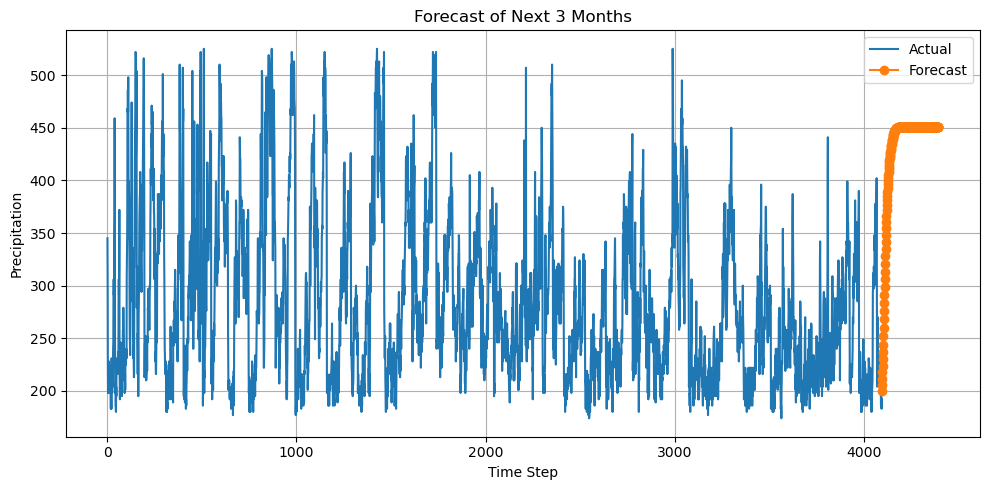

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test_inverse_lstm)), y_test_inverse_lstm, label='Actual')
plt.plot(range(len(y_test_inverse_lstm), len(y_test_inverse_lstm) + 300), future_preds, label='Forecast', marker='o')
plt.title('Forecast of Next 3 Months')
plt.xlabel('Time Step')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Ensemble Learning : LSTM + XGBoost

In [73]:
y_pred_ensl_1 = (y_pred_inverse_lstm + y_pred_xgboost) / 2

In [74]:
y_pred_ensl_1

array([412.2742 , 297.4074 , 305.10834, ..., 205.77979, 203.07079,
       199.46432], dtype=float32)

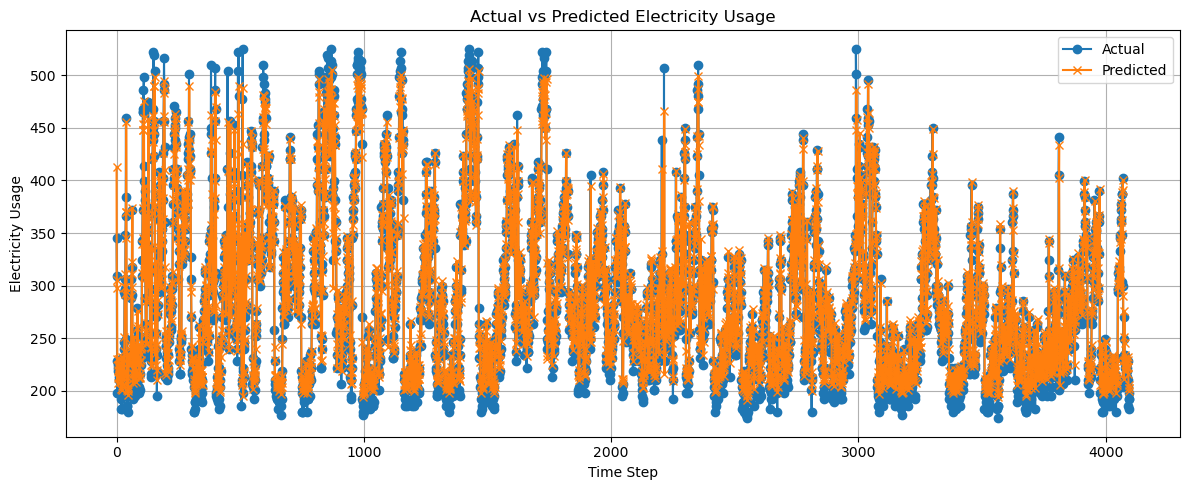

In [75]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_inverse_lstm, label='Actual', marker='o')
plt.plot(y_pred_ensl_1, label='Predicted', marker='x')
plt.title('Actual vs Predicted Electricity Usage')
plt.xlabel('Time Step')
plt.ylabel('Electricity Usage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Weighted Averaging (Optimized)

In [76]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
import numpy as np

In [77]:
lstm_pred = y_pred_inverse_lstm.copy()
xgb_pred = y_pred_xgboost.copy()
y_true = y_test_inverse_lstm.copy()

In [78]:
# Fungsi loss untuk optimasi (pakai MSE, bisa diganti MAE juga)
def loss_fn(w):
    ensemble = w * lstm_pred + (1 - w) * xgb_pred
    return mean_squared_error(y_true, ensemble)

In [79]:
# Mulai optimasi: cari w antara 0 dan 1
result = minimize(loss_fn, x0=[0.5], bounds=[(0.0, 1.0)])

In [80]:
best_weight_lstm = result.x[0]
best_weight_xgb = 1 - best_weight_lstm

In [81]:
best_weight_lstm, best_weight_xgb

(0.49207169335964834, 0.5079283066403517)

In [82]:
# Prediksi dengan bobot terbaik
y_pred_ensl_2 = best_weight_lstm * lstm_pred + best_weight_xgb * xgb_pred

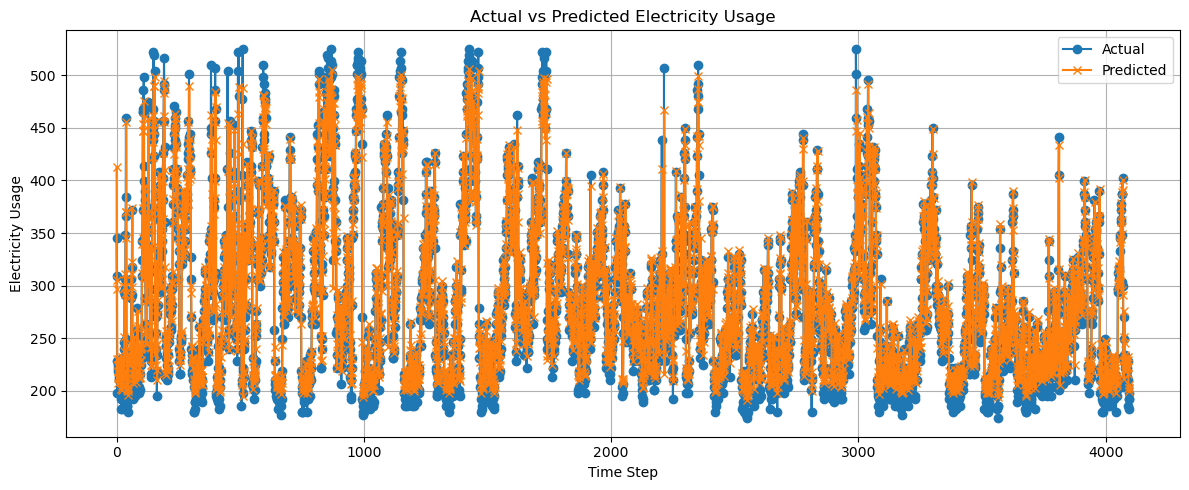

In [83]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_inverse_lstm, label='Actual', marker='o')
plt.plot(y_pred_ensl_2, label='Predicted', marker='x')
plt.title('Actual vs Predicted Electricity Usage')
plt.xlabel('Time Step')
plt.ylabel('Electricity Usage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Stacking

In [84]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [85]:
# Gabungkan hasil model jadi fitur
X_meta = np.hstack([
    lstm_pred.reshape(-1, 1),
    xgb_pred.reshape(-1, 1)
])
y_meta = y_test_inverse_lstm.reshape(-1)

In [86]:
meta_model = LinearRegression()
meta_model.fit(X_meta, y_meta)

LinearRegression()

In [87]:
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [88]:
y_pred_ensl_3 = meta_model.predict(X_meta)

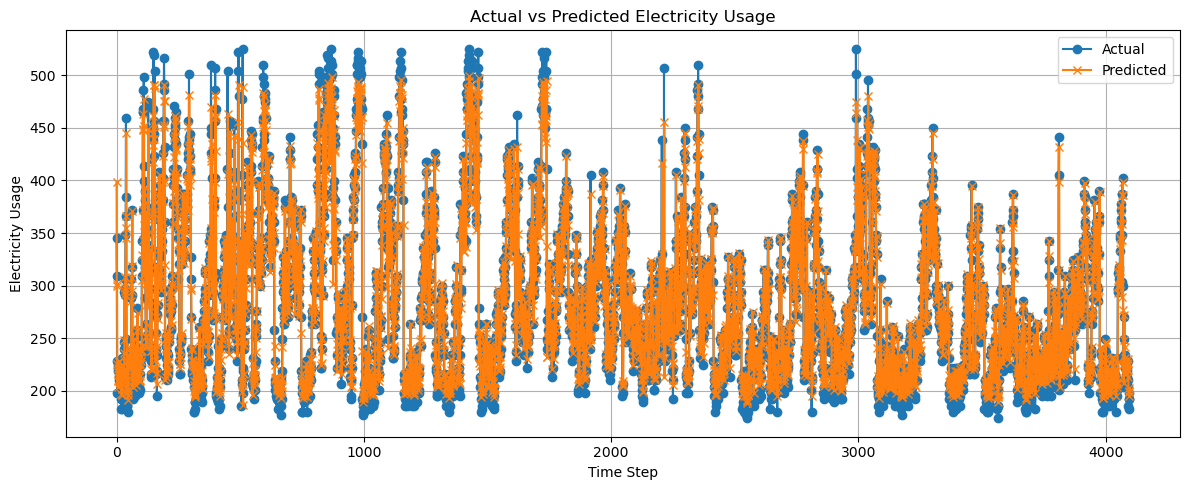

In [89]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_inverse_lstm, label='Actual', marker='o')
plt.plot(y_pred_ensl_3, label='Predicted', marker='x')
plt.title('Actual vs Predicted Electricity Usage')
plt.xlabel('Time Step')
plt.ylabel('Electricity Usage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Multivariate Model

In [112]:
# Lakukan one-hot-encoding pada kolom dampak_lingkungan
from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data[['dampak_lingkungan']])
one_hot_data = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(['dampak_lingkungan']), index=data.index)
data_dropped = data.drop('dampak_lingkungan', axis=1)
data_encoded = pd.concat([data_dropped.iloc[:, :6], one_hot_data, data_dropped.iloc[:, 6:]], axis=1)
data = data_encoded

# XGBoost

In [90]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [108]:
# Create lag features
def create_lag_features(df, target_column, lags=3):
    df_copy = df.copy()
    for lag in range(1, lags + 1):
        for col in df.columns:
            df_copy[f"{col}_lag{lag}"] = df[col].shift(lag)
    df_copy = df_copy.dropna()
    X = df_copy.drop(columns=[target_column])
    y = df_copy[target_column]
    return X, y

In [113]:
# Create features
X, y = create_lag_features(data, target_column='konsumsi_listrik', lags=3)

In [114]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [115]:
# Train the model
model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [116]:
y_pred_xgboost_m = model.predict(X_test)

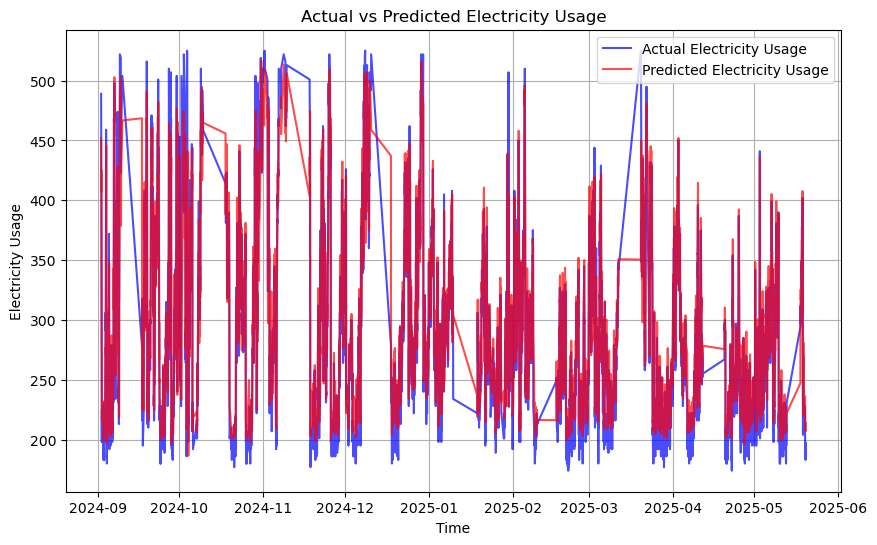

In [117]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual Electricity Usage", color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred_xgboost_m, label="Predicted Electricity Usage", color='red', alpha=0.7)
plt.title("Actual vs Predicted Electricity Usage")
plt.xlabel("Time")
plt.ylabel("Electricity Usage")
plt.legend()
plt.grid(True)
plt.show()

# LSTM

In [97]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [118]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [119]:
# Prepare sequences for LSTM model
def create_sequences(df, target_column, sequence_length=10):
    X, y = [], []
    for i in range(sequence_length, len(df)):
        X.append(df.iloc[i-sequence_length:i].values)
        y.append(df[target_column].iloc[i])
    return np.array(X), np.array(y)

In [120]:
# Prepare features and target for LSTM
sequence_length = 10
target_column = "konsumsi_listrik"

X, y = create_sequences(scaled_df, target_column, sequence_length)

In [121]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [122]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Output layer to predict the target variable

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Eric\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [123]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - loss: 0.0230 - val_loss: 0.0088
Epoch 2/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - loss: 0.0079 - val_loss: 0.0075
Epoch 3/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 0.0073 - val_loss: 0.0069
Epoch 4/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 0.0070 - val_loss: 0.0065
Epoch 5/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - loss: 0.0071 - val_loss: 0.0066
Epoch 6/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 7/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - loss: 0.0072 - val_loss: 0.0064
Epoch 8/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 0.0070 - val_loss: 0.0066
Epoch 9/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 10/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - loss: 0.0066 - val_loss: 0.0064
Epoch 11/100
513/513 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 12/100
513/51

In [124]:
y_pred_lstm_m = model.predict(X_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [125]:
# Inverse scale the predictions and actual values
y_pred_rescaled_lstmm = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_pred_lstm_m), axis=1))[:, -1]
y_test_rescaled_lstmm = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], y_test.reshape(-1, 1)), axis=1))[:, -1]

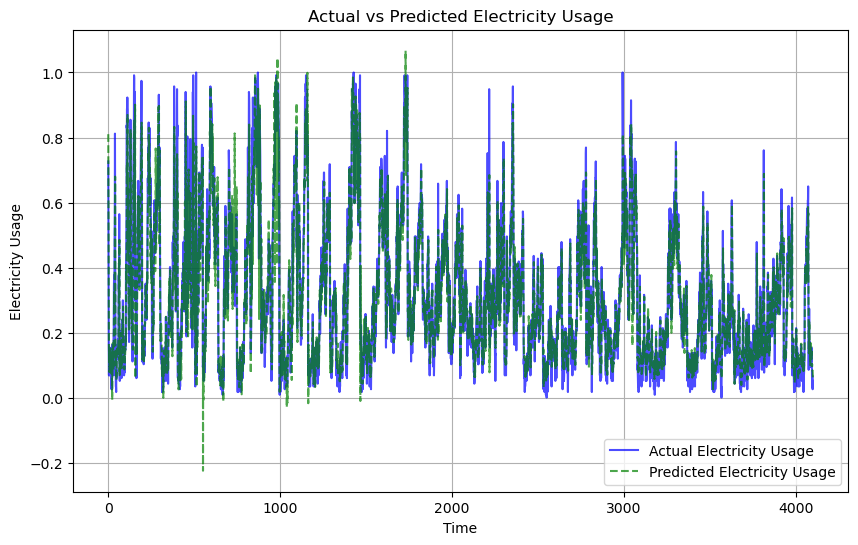

In [126]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled_lstmm, label="Actual Electricity Usage", color='blue', alpha=0.7)
plt.plot(y_pred_rescaled_lstmm, label="Predicted Electricity Usage", color='green', linestyle='dashed', alpha=0.7)
plt.title("Actual vs Predicted Electricity Usage")
plt.xlabel("Time")
plt.ylabel("Electricity Usage")
plt.legend()
plt.grid(True)
plt.show()

# Sarimax

In [128]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

total_len = len(data)
train_size = int(0.8 * total_len)

df_sarimax_train = data.iloc[:train_size].copy()
df_sarimax_test = data.iloc[train_size:].copy()

In [130]:
# endogenous (target) dan exogenous variabel
endog_train = df_sarimax_train['konsumsi_listrik']
exog_train = df_sarimax_train.drop(['ID', 'konsumsi_listrik'], axis=1)
endog_test = df_sarimax_test['konsumsi_listrik']
exog_test = df_sarimax_test.drop(['ID', 'konsumsi_listrik'], axis=1)

In [131]:
sarimax_model = SARIMAX(
    endog=endog_train,
    exog=exog_train,
    order=(1, 1, 0),
    seasonal_order=(1, 1, 0, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarimax_results = sarimax_model.fit(disp=False)

C:\Users\Eric\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Eric\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# Multiple Linear Regression

In [132]:
df_multiRegression_train = data.iloc[:train_size].copy()
df_multiRegression_test = data.iloc[train_size:].copy()

df_multiRegression_train_features = df_multiRegression_train.drop(['ID', 'konsumsi_listrik'], axis=1)
df_multiRegression_test_features = df_multiRegression_test.drop(['ID', 'konsumsi_listrik'], axis=1)

multiLinearRegression = LinearRegression()
multiLinearRegression.fit(df_multiRegression_train_features.values, df_multiRegression_train['konsumsi_listrik'])
multiLinearRegressionPrediction = multiLinearRegression.predict(df_multiRegression_test_features.values)

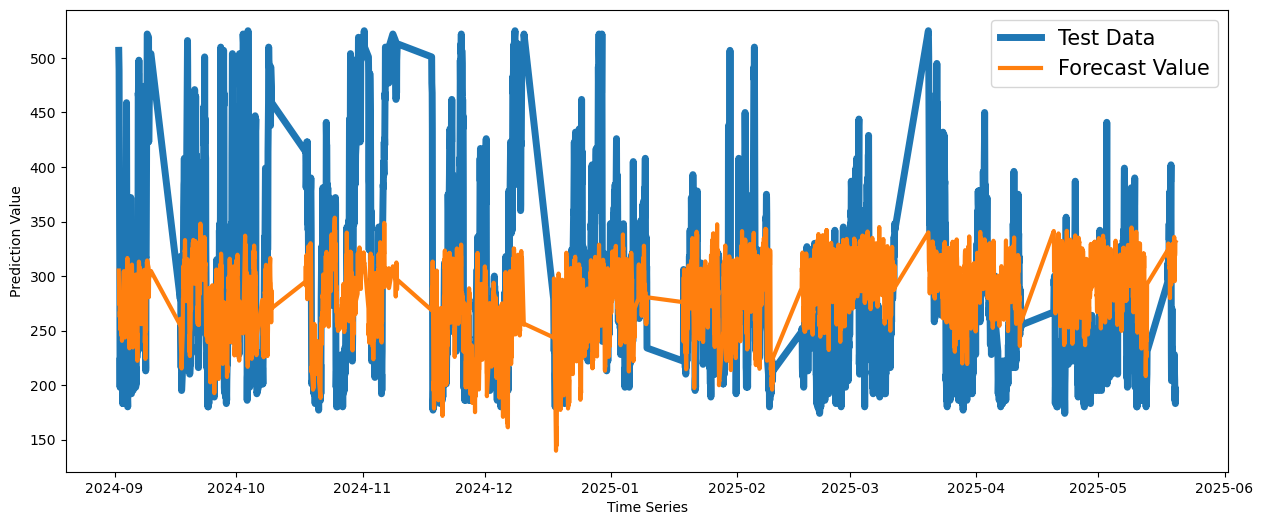

In [133]:
linearRegression_fig = plt.figure()
linearRegression_fig.set_figwidth(15)
linearRegression_fig.set_figheight(6)

plt.xlabel("Time Series")
plt.ylabel("Prediction Value")

plt.plot(df_multiRegression_test.index, df_multiRegression_test['konsumsi_listrik'], linewidth=5, label="Test Data")
plt.plot(df_multiRegression_test.index, multiLinearRegressionPrediction, linewidth=3, label="Forecast Value")

plt.legend(fontsize=15)
plt.show()

**Model Evaluation**

Univariate Analysis

In [134]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

def evaluate_model(df_test, forecast):
    mse = mean_squared_error(df_test, forecast)
    rmse = np.sqrt(mse)
    r2 = r2_score(df_test, forecast)
    mape = mean_absolute_percentage_error(df_test, forecast)

    # print(f'p = {p}, d = {d}, q = {q}')
    print(f'MSE = {mse:.4f}')
    print(f'RMSE = {rmse:.4f}')
    print(f'R² = {r2:.4f}')
    print(f'MAPE = {mape:.4f}')

In [ ]:
# ARIMA

In [135]:
arima_forecast_result = arima_model_fit.get_forecast(steps=len(data_single_test))
arima_forecast = arima_forecast_result.predicted_mean
arima_conf_int = arima_forecast_result.conf_int
arima_forecast

array([514.27527238, 505.6171238 , 496.22167109, ..., 468.84604668,
       468.84604668, 468.84604668])

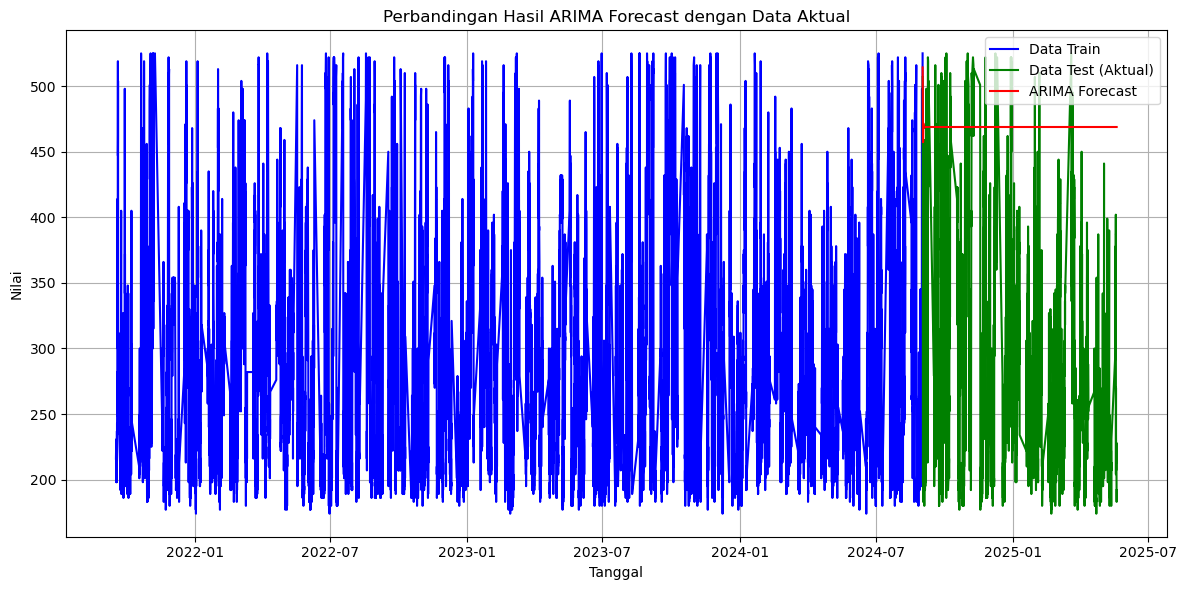

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data_single_train.index, data_single_train, label='Data Train', color='blue')
plt.plot(data_single_test.index, data_single_test, label='Data Test (Aktual)', color='green')
plt.plot(data_single_test.index, arima_forecast, label='ARIMA Forecast', color='red')

plt.title('Perbandingan Hasil ARIMA Forecast dengan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [138]:
evaluate_model(arima_forecast, data_single_test)

MSE = 40071.7471
RMSE = 200.1793
R² = -30813.6484
MAPE = 0.3978


In [ ]:
# SARIMA

In [139]:
sarima_forecast_result = sarima_model_fit.get_forecast(steps=len(data_single_test))
sarima_forecast = sarima_forecast_result.predicted_mean

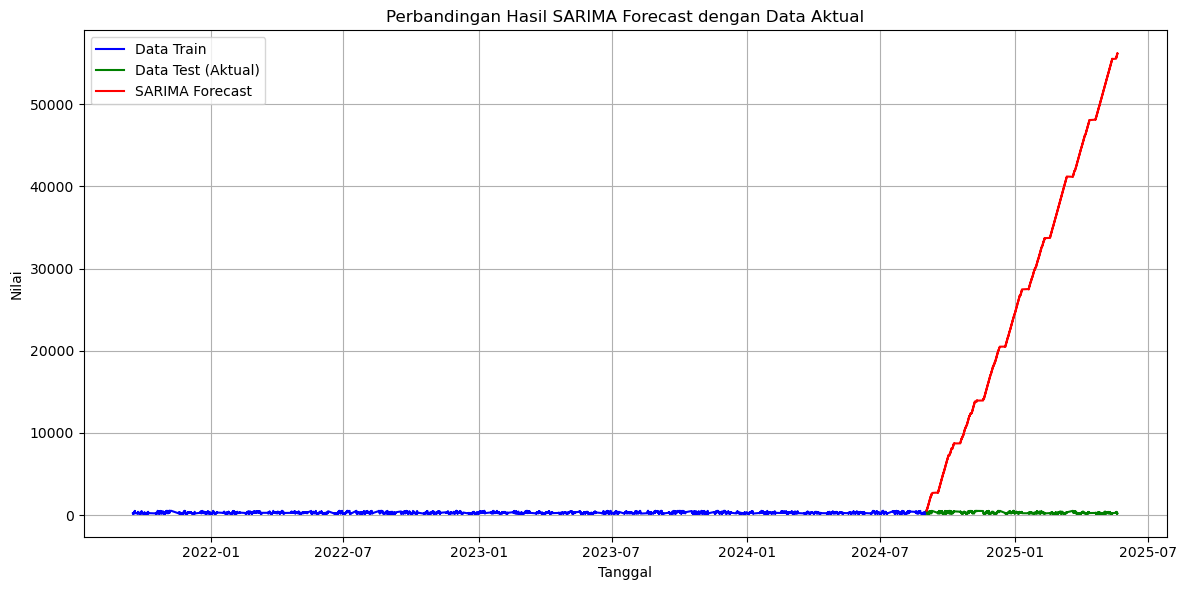

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data_single_train.index, data_single_train, label='Data Train', color='blue')
plt.plot(data_single_test.index, data_single_test, label='Data Test (Aktual)', color='green')
plt.plot(data_single_test.index, sarima_forecast, label='SARIMA Forecast', color='red')

plt.title('Perbandingan Hasil SARIMA Forecast dengan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [141]:
evaluate_model(data_single_test, sarima_forecast)

MSE = 1047452713.7769
RMSE = 32364.3741
R² = -176658.5004
MAPE = 108.9483


In [ ]:
# Exponential Smoothing

In [ ]:
# Single Exponential Smoothing

In [142]:
ses_forecast = ses_fit.forecast(steps=len(data_single_test))
print("SES Parameters:", ses_fit.params)

SES Parameters: {'smoothing_level': 0.9717756560365458, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 216.0883777282419, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


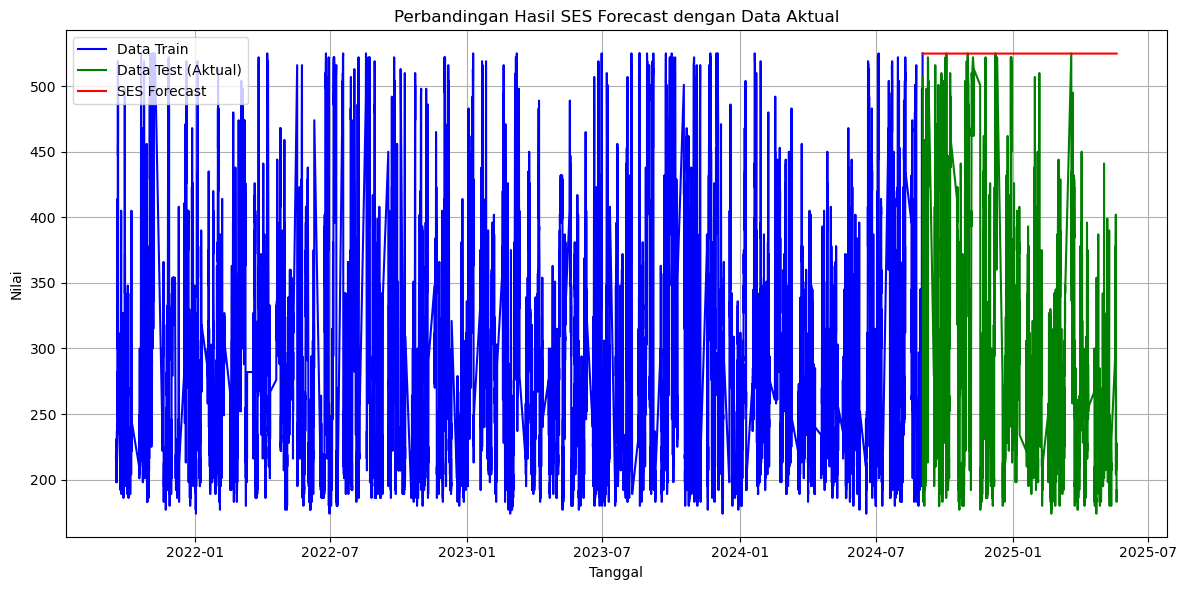

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data_single_train.index, data_single_train, label='Data Train', color='blue')
plt.plot(data_single_test.index, data_single_test, label='Data Test (Aktual)', color='green')
plt.plot(data_single_test.index, ses_forecast, label='SES Forecast', color='red')

plt.title('Perbandingan Hasil SES Forecast dengan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Double Exponential Smoothing

In [144]:
des_forecast = des_fit.forecast(steps=len(data_single_test))
print("SES Parameters:", ses_fit.params)

SES Parameters: {'smoothing_level': 0.9717756560365458, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 216.0883777282419, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


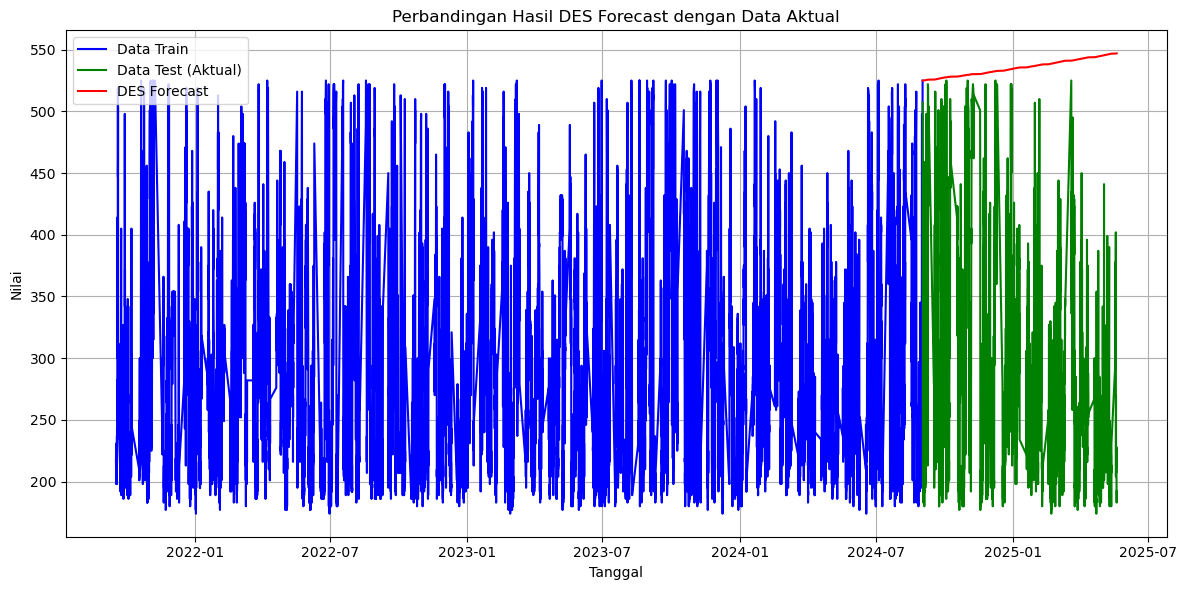

In [145]:
plt.figure(figsize=(12, 6))
plt.plot(data_single_train.index, data_single_train, label='Data Train', color='blue')
plt.plot(data_single_test.index, data_single_test, label='Data Test (Aktual)', color='green')
plt.plot(data_single_test.index, des_forecast, label='DES Forecast', color='red')

plt.title('Perbandingan Hasil DES Forecast dengan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Triple Exponential Smoothing

In [146]:
tes_forecast = tes_fit.forecast(steps=len(data_single_test))
print("TES Parameters:", ses_fit.params)

TES Parameters: {'smoothing_level': 0.9717756560365458, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 216.0883777282419, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


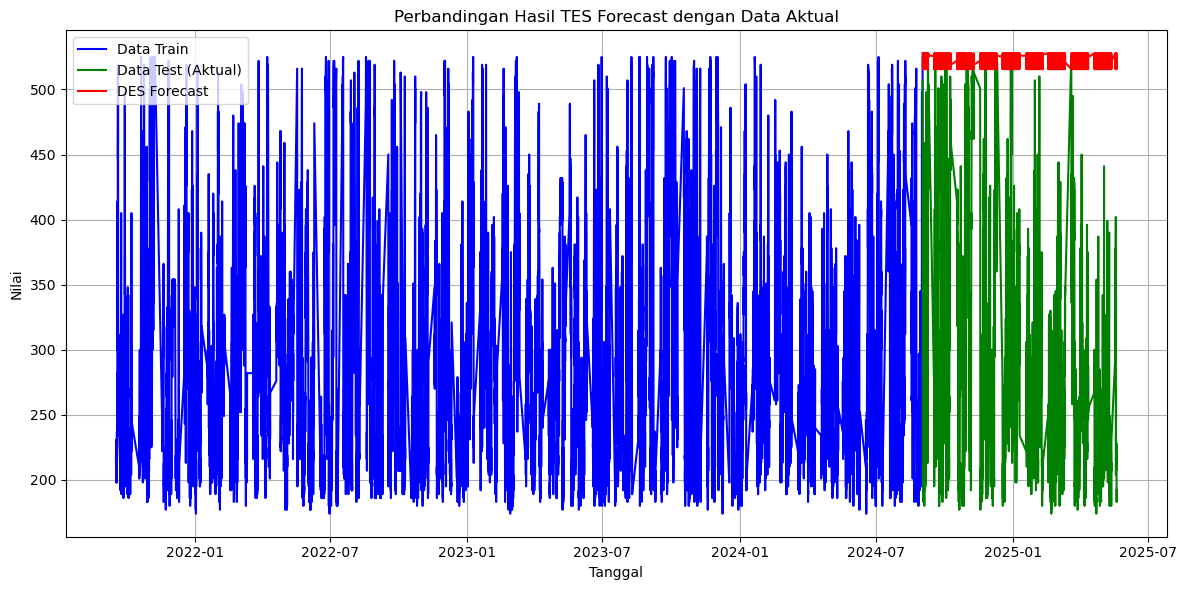

In [147]:
plt.figure(figsize=(12, 6))
plt.plot(data_single_train.index, data_single_train, label='Data Train', color='blue')
plt.plot(data_single_test.index, data_single_test, label='Data Test (Aktual)', color='green')
plt.plot(data_single_test.index, tes_forecast, label='DES Forecast', color='red')

plt.title('Perbandingan Hasil TES Forecast dengan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [148]:
evaluate_model(data_single_test, tes_forecast)

MSE = 63458.7777
RMSE = 251.9103
R² = -9.7027
MAPE = 0.9671


In [149]:
ses_forecast = ses_fit.forecast(steps=len(data_single_test))
ses_forecast

array([524.82715779, 524.82715779, 524.82715779, ..., 524.82715779,
       524.82715779, 524.82715779])

In [ ]:
# Simple Linear Regression

In [150]:
evaluate_model(yPreadLinearRegression, yTestLinearRegression)

MSE = 6230.1527
RMSE = 78.9313
R² = -3153.1865
MAPE = 0.2219


In [183]:
yPreadLinearRegression

array([[288.33411124],
       [288.33411124],
       [288.33411124],
       ...,
       [293.22735074],
       [293.22735074],
       [293.22735074]])

ValueError: x and y must have same first dimension, but have shapes (4100,) and (16397, 1)

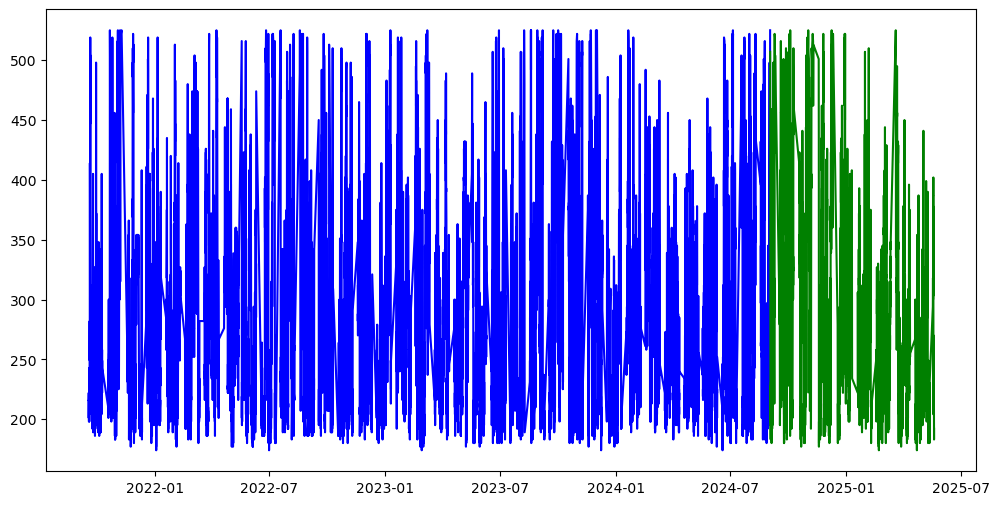

In [186]:
import matplotlib.pyplot as plt

adjusted_data_single_test = data_single_test[:]

plt.figure(figsize=(12, 6))
plt.plot(data_single_train.index, data_single_train, label='Data Train', color='blue')
plt.plot(data_single_test.index, data_single_test, label='Data Test (Aktual)', color='green')
plt.plot(data_single_test.index, yPreadLinearRegression, label='Simple Linear Forecast', color='red')

plt.title('Perbandingan Hasil Simple Linear Regression dengan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Prophet

In [173]:
adjusted_dataTestProphet = dataTestProphet[dataTestProphet['ds'].isin(forecastProphet['ds'])]
evaluate_model(forecastProphet['yhat'], adjusted_dataTestProphet['y'].values)

MSE = 6325.3486
RMSE = 79.5321
R² = -41.6377
MAPE = 0.2174


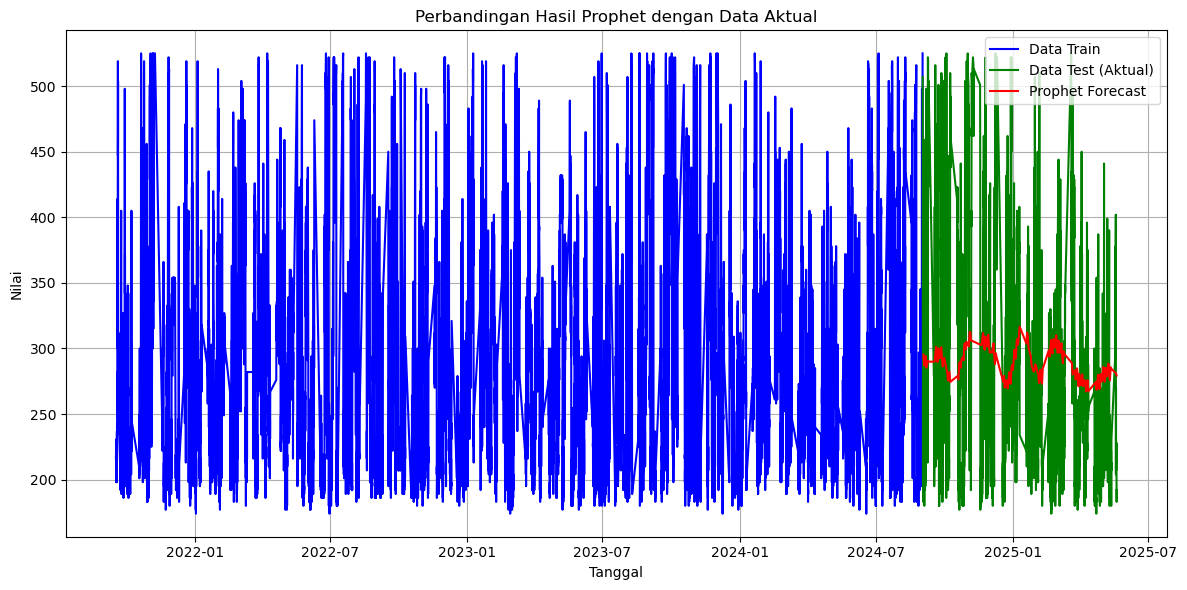

In [181]:
import matplotlib.pyplot as plt

adjusted_data_single_test = data_single_test[data_single_test.index.isin(forecastProphet['ds'])]

plt.figure(figsize=(12, 6))
plt.plot(data_single_train.index, data_single_train, label='Data Train', color='blue')
plt.plot(data_single_test.index, data_single_test, label='Data Test (Aktual)', color='green')
plt.plot(adjusted_data_single_test.index, forecastProphet['yhat'], label='Prophet Forecast', color='red')

plt.title('Perbandingan Hasil Prophet dengan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# XGBoost

In [154]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [155]:
# Trim y_test to match prediction length
y_test_aligned = y_test[:len(y_pred_xgboost)]

In [156]:
mae = mean_absolute_error(y_test_aligned, y_pred_xgboost)
mse = mean_squared_error(y_test_aligned, y_pred_xgboost)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_aligned, y_pred_xgboost)

In [157]:
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 284.1980
Mean Squared Error (MSE): 85940.2064
Root Mean Squared Error (RMSE): 293.1556
R² Score: -1791797.5181


In [ ]:
# LSTM

In [201]:
adjusted_y_test = y_test[:-1]

mae = mean_absolute_error(adjusted_y_test, y_pred_inverse_lstm)
mse = mean_squared_error(adjusted_y_test, y_pred_inverse_lstm)
rmse = np.sqrt(mse)
r2 = r2_score(adjusted_y_test, y_pred_inverse_lstm)

In [202]:
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 288.9646
MSE: 88580.2055
RMSE: 297.6243
R²: -1846839.8169


Multivariate Analysis

In [ ]:
# XGBoost

In [159]:
# Trim y_test to match prediction length
min_len = min(len(y_test), len(y_pred_xgboost_m))
y_test_aligned = y_test[:min_len]
y_pred_aligned = y_pred_xgboost_m[:min_len]

In [160]:
mae = mean_absolute_error(y_test_aligned, y_pred_aligned)
mse = mean_squared_error(y_test_aligned, y_pred_aligned)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_aligned, y_pred_aligned)

In [161]:
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 289.5957
Mean Squared Error (MSE): 89032.5024
Root Mean Squared Error (RMSE): 298.3831
R² Score: -1856074.5620


In [ ]:
# LSTM

In [162]:
mae = mean_absolute_error(y_test, y_pred_rescaled_lstmm)
mse = mean_squared_error(y_test, y_pred_rescaled_lstmm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rescaled_lstmm)

In [163]:
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.0591
Mean Squared Error (MSE): 0.0076
Root Mean Squared Error (RMSE): 0.0870
R² Score: 0.8423


In [ ]:
# SARIMAX

In [164]:
sarimax_forecast_res = sarimax_results.get_forecast(steps=len(endog_test), exog=exog_test)
sarimax_forecast_pred = sarimax_forecast_res.predicted_mean

C:\Users\Eric\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Eric\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


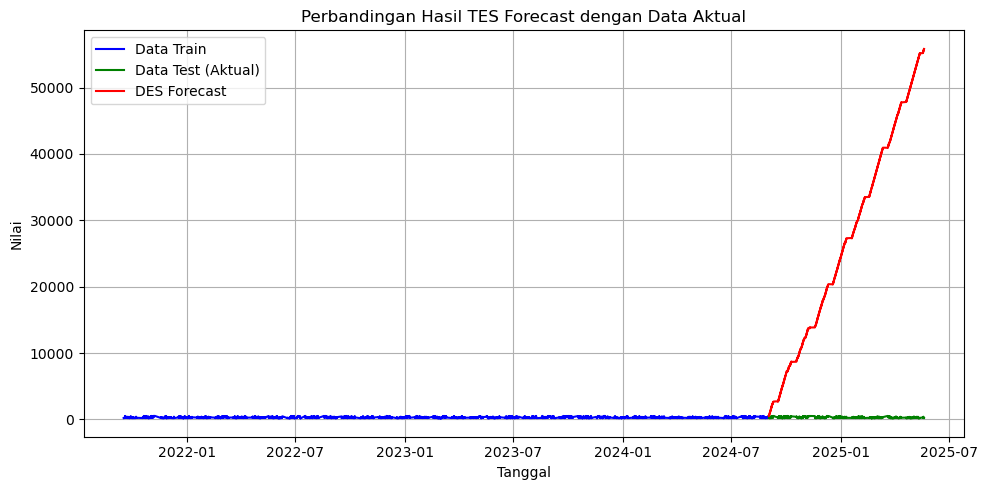

In [165]:
plt.figure(figsize=(10, 5))
plt.plot(endog_train.index, endog_train, label='Data Train', color='blue')
plt.plot(endog_test.index, endog_test, label='Data Test (Aktual)', color='green')
plt.plot(endog_test.index, sarimax_forecast_pred, label='DES Forecast', color='red')

plt.title('Perbandingan Hasil TES Forecast dengan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Multiple Linear Regression

In [166]:
evaluate_model(multiLinearRegressionPrediction, df_multiRegression_test['konsumsi_listrik'])

MSE = 5503.0834
RMSE = 74.1828
R² = -3.7746
MAPE = 0.2031


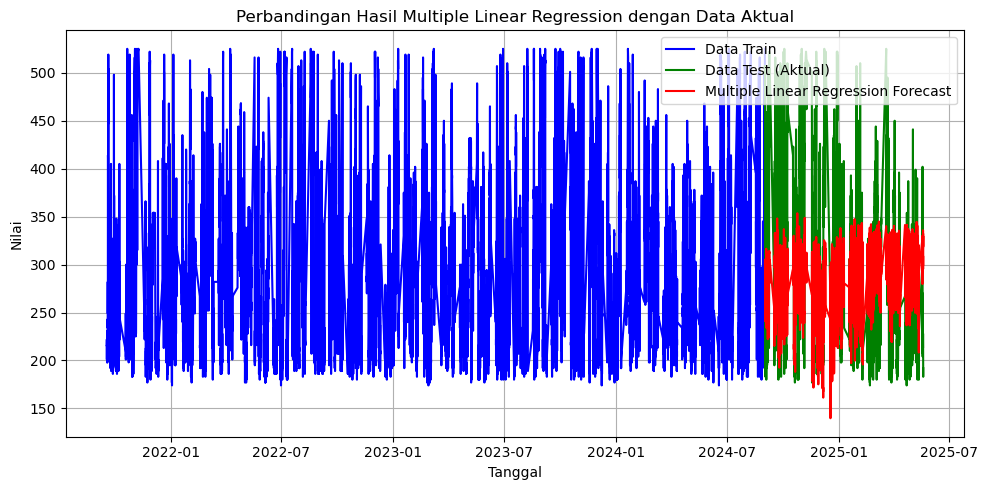

In [167]:
plt.figure(figsize=(10, 5))
plt.plot(df_multiRegression_train.index, df_multiRegression_train['konsumsi_listrik'], label='Data Train', color='blue')
plt.plot(df_multiRegression_test.index, df_multiRegression_test['konsumsi_listrik'], label='Data Test (Aktual)', color='green')
plt.plot(df_multiRegression_test.index, multiLinearRegressionPrediction, label='Multiple Linear Regression Forecast', color='red')

plt.title('Perbandingan Hasil Multiple Linear Regression dengan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()